In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 16.17 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.



![Alt text](https://raw.githubusercontent.com/AshishJangra27/temporary/refs/heads/main/company%20insights.png)

## Dataset Documentation

### 1. Overview
This dataset contains information about job postings from various companies. It includes details such as job roles, companies, experience requirements, salary, location, and more. Below is a detailed description of the dataset:

### 2. Dataset Summary
- **Total Records:** 79,147
- **Total Columns:** 12
- **File Format:** CSV

### 3. Column Descriptions
| Column Name         | Description                                                                                       | Data Type  | Example Value                       |
|---------------------|---------------------------------------------------------------------------------------------------|------------|-------------------------------------|
| `job_id`           | Unique identifier for each job posting.                                                          | `float64`  | 7012301001                       |
| `job_role`         | Title of the job role.                                                                           | `object`   | Branch Banking - Calling For Women Candidates |
| `company`          | Name of the company offering the job.                                                           | `object`   | Hdfc Bank                          |
| `experience`       | Experience required for the job (in years).                                                     | `object`   | 1-6 Yrs                             |
| `salary`           | Salary details of the job.                                                                       | `object`   | Not disclosed                       |
| `location`         | Location(s) where the job is available.                                                         | `object`   | Kolkata, Hyderabad, Pune           |
| `rating`           | Company rating based on reviews (if available).                                                 | `float64`  | 4.0                                 |
| `reviews`          | Number of reviews for the company.                                                              | `object`   | 39110 Reviews                       |
| `responsibilities` | Key responsibilities of the job role.                                                           | `object`   | Customer Service, Sales, Relationship Management |
| `posted_on`        | Date when the job posting was created.                                                          | `object`   | 1 Day Ago                           |
| `job_link`         | URL link to the job posting.                                                                     | `object`   | [Job Link](https://www.example.com) |
| `company_link`     | URL link to the company's profile.                                                               | `object`   | [Company Link](https://www.example.com) |

### 4. Data Quality
- **Missing Values:**
  - Columns such as `job_id`, `company`, `experience`, `location`, `rating`, and `reviews` have missing values.
  - `rating` and `reviews` have significant missing entries (45% missing).
- **Data Types:**
  - Mixed data types include `float64` for numerical values and `object` for text data.

### 5. Insights and Observations
- **Key Columns:**
  - `job_role` and `company` provide essential information about job postings.
  - `experience` helps identify the target audience for the job.
  - `rating` and `reviews` offer insights into company reputation.
- **Potential Analysis:**
  - Analyze job trends by `location` and `salary`.
  - Investigate company ratings and their correlation with the number of reviews.

### 6. Next Steps
- **Data Cleaning:**
  - Handle missing values in critical columns (`job_id`, `company`, `experience`, etc.).
  - Normalize textual data (e.g., unify formats for `location` and `experience`).
- **Exploratory Data Analysis (EDA):**
  - Visualize job distribution by `location`, `company`, and `experience`.
  - Explore salary patterns and trends.
  - Evaluate company ratings and reviews.
- **Modeling:**
  - Predict salary ranges based on job role, experience, and location.
  - Cluster similar jobs based on responsibilities and other features.

---
**Note:** This documentation follows industry standards for dataset description and is intended for seamless integration with Jupyter Notebooks for analysis and sharing.


In [27]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration

#### 1.1) Loading the Dataset

In [3]:
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')
df.head(2)

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...


#### 1.2) Removing "posted_on" Columns

In [4]:
del df['posted_on']

#### 1.3) Check Null Values

In [5]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
job_link,480


#### 1.4) Removign rows with null values in job_id,company and responsibility column

In [6]:
df.dropna(subset = ['job_id','company','resposibilities'], inplace = True)

#### 1.5) Filling Null values in location and experience column with most frequent

In [7]:
df['location'].fillna(df['location'].mode()[0], inplace = True)
df['experience'].fillna(df['experience'].mode()[0], inplace = True)

#### 1.6) Filling Null values in rating and reviews column with 0

In [8]:
df['rating'].fillna(0.0,inplace = True)
df['reviews'].fillna('0 Reviews',inplace = True)

In [9]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,0
reviews,0
resposibilities,0
job_link,0


#### 1.7) Remove Duplicates

In [10]:
df.drop_duplicates(subset=['job_link'],inplace = True)

### 2. Data Cleaning

#### 2.1) Cleaning Job_id Column

In [11]:
df['job_id'] = df['job_id'].astype('int').astype('str')

#### 2.2) Creating Company ID Column

In [12]:
df['company_id'] = df['company_link'].str.split('-').str[-1]

#### 2.3) Removing Companies with company_id = 0

In [13]:
df = df[df['company_id'] != '0']

#### 2.4) Cleaning Experience Column

In [14]:
df['start_exp'] = df['experience'].str.replace('Yrs','').str.strip().str.split('-').str[0].astype('int')
df['end_exp'] = df['experience'].str.replace('Yrs','').str.strip().str.split('-').str[1].astype('int')

#### 2.5) Cleaning Salary Column

###### 2.5.1 Removing Categories like gradudate etc

In [15]:
salary_clean = []

for i in df['salary']:
  if bool(re.search(r'\d', i)) == False or 'Cr' in i:
    salary_clean.append('Not disclosed')
  else:
    salary_clean.append(i)

df['salary_clean'] = salary_clean

###### 2.5.2 Splitting salaries

In [16]:
min_salaries = []
max_salaries = []

for i in df['salary_clean']:

  if i == 'Not disclosed':
    min_salary = 'Not disclosed'
    max_salary = 'Not disclosed'

  elif len(i.split('-')) == 2:
    min_salary = i.split('PA')[0].split('-')[0].strip().replace(',','')
    max_salary = i.split('PA')[0].split('-')[1].strip().replace(',','')


  elif len(i.split('-')) == 1:
    min_salary = ''.join(re.findall(r'\d', i.split('PA')[0]))
    max_salary = ''.join(re.findall(r'\d', i.split('PA')[0]))


  min_salaries.append(min_salary)
  max_salaries.append(max_salary)

df['min_salary'] = min_salaries
df['max_salary'] = max_salaries

###### 2.5.3 Clean further minimum and maximum salaries

In [17]:
df.loc[df['min_salary'] == 'Less than 5000', 'min_salary'] = '5000'
df.loc[df['min_salary'] == 'Less than 50000', 'min_salary'] = '50000'

#### 2.6) Cleaning Reviews Column

In [18]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

#### 2.7) Cleaning Location

In [19]:
df['location'].str.split(',').explode().str.lower().explode().nunique()

4777

### 3. Companies Analysis

#### 3.1) Top 20 Companies with maximum Job Openings

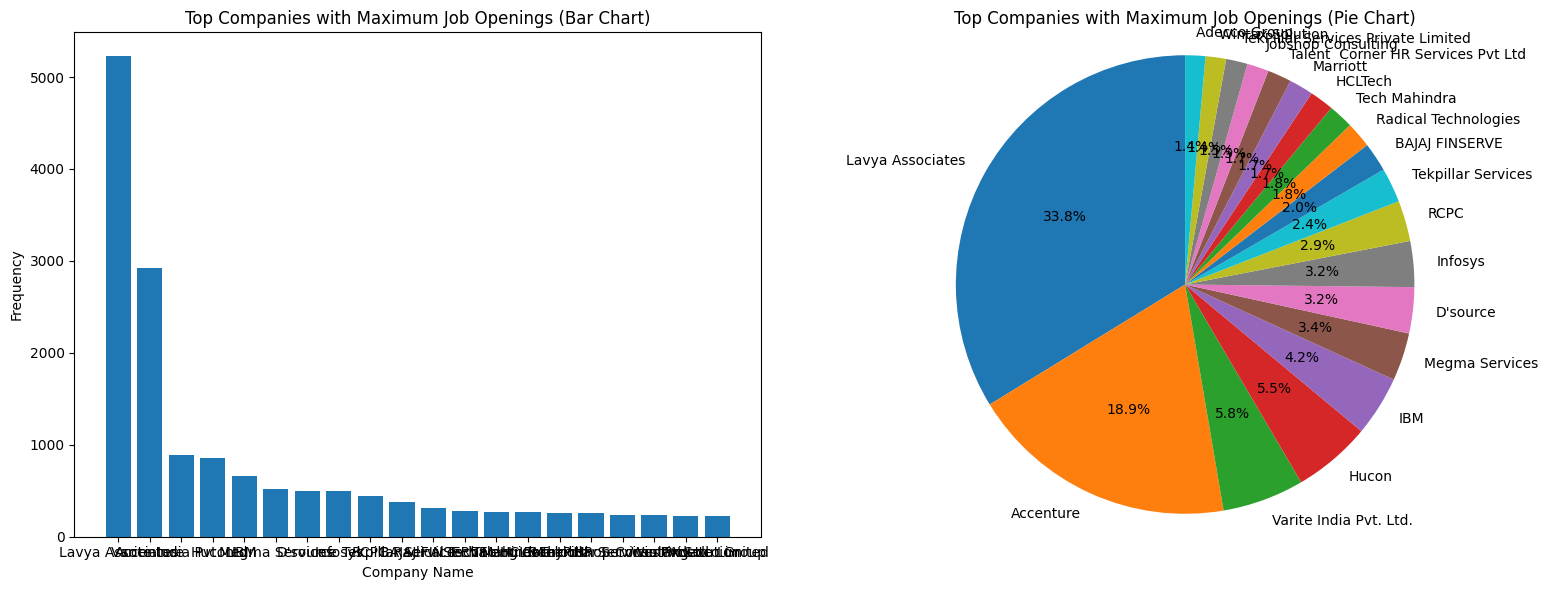

In [20]:
freq       = df['company_id'].value_counts().head(20).values
company_id = df['company_id'].value_counts().head(20).index

company_name = []

for i in company_id:
  company_name.append(df[df['company_id'] == i]['company'].value_counts().index[0])

data = {'company_name': company_name, 'company_id': company_id,'freq': freq}

company_df = pd.DataFrame(data)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar chart on the left
axes[0].bar(company_df['company_name'], company_df['freq'])
axes[0].set_xlabel("Company Name")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Top Companies with Maximum Job Openings (Bar Chart)")


# Pie chart on the right
axes[1].pie(company_df['freq'], labels=company_df['company_name'], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Top Companies with Maximum Job Openings (Pie Chart)")
axes[1].axis('equal')  # Equal aspect ratio for the pie chart

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### 3.2) Top 5 Company with Maximum Salary Variation

In [21]:
df_salary = df[df['min_salary'] != 'Not disclosed']

df_salary['max_salary'] = df_salary['max_salary'].astype('int')
df_salary['min_salary'] = df_salary['min_salary'].astype('int')


salary_range_df = pd.DataFrame({'max_salary': df_salary.groupby('company_id')['max_salary'].max(),
                                'min_salary': df_salary.groupby('company_id')['min_salary'].min()})


salary_range_df['salary_diff'] = salary_range_df['max_salary'] - salary_range_df['min_salary']

salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5)

company_id = salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5).index

company_name = []

for i in company_id:
  company_name.append(df_salary[df_salary['company_id'] == i]['company'].value_counts().index[0])

final_df = salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5)

final_df['company_name'] = company_name

rearranged_df = final_df[['company_name', 'min_salary', 'max_salary', 'salary_diff']]
rearranged_df

,company_name,min_salary,max_salary,salary_diff
company_id,,,,
1512600,Experis,50000,90000000,89950000
68313,Tata International,350000,90000000,89650000
6021346,DM Healthcare Llc,100000,85000000,84900000
4422386,Vision India Services,150000,80000000,79850000
123508647,Bhagat Hr Services,175000,80000000,79825000


#### 3.3) Top 5 Company hiring for most numbers of locations

In [22]:
company_ids = df['company_id'].unique()
freq = []


for company_id in tqdm(company_ids):
  freq.append([company_id,df[df['company_id']== company_id]['location'].str.split(',').explode().str.lower().explode().str.split('/').explode().str.split('-').explode().str.strip().nunique()])

freq_df = pd.DataFrame(freq, columns = ['company_id','freq'])

freq_df.sort_values(by = 'freq', ascending = False).head(5)

100%|██████████| 13790/13790 [02:41<00:00, 85.47it/s]


,company_id,freq
376,6379242,253
3501,123598343,247
1008,932996,241
10492,4570964,219
35,49075,171


#### 3.4) Rating Distribution as per Companies

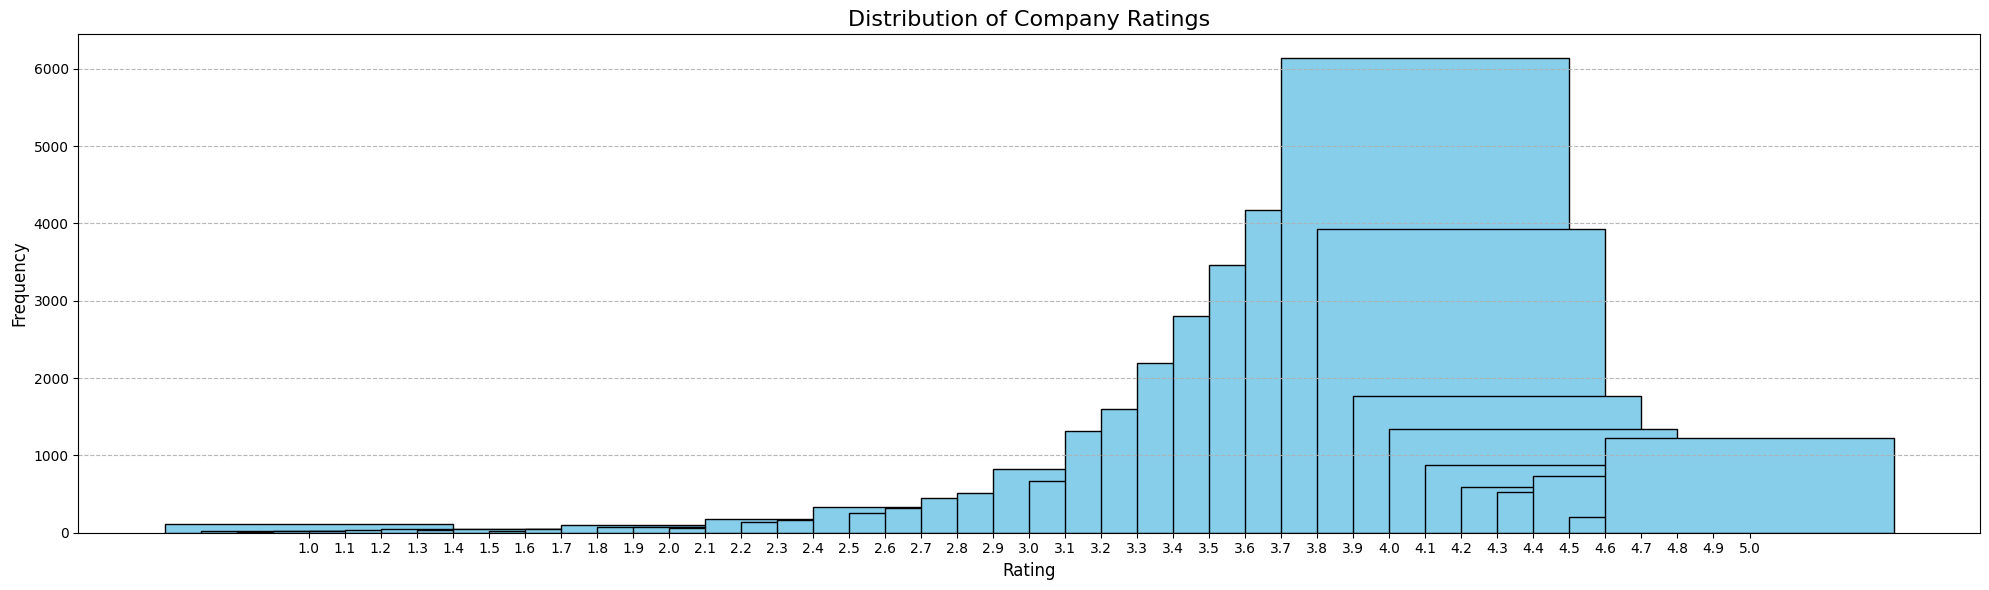

In [23]:
rating_counts = df[df['rating'] != 0.0]['rating'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Company Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rating_counts.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

#### 3.5) Salary vs Experience of any Company

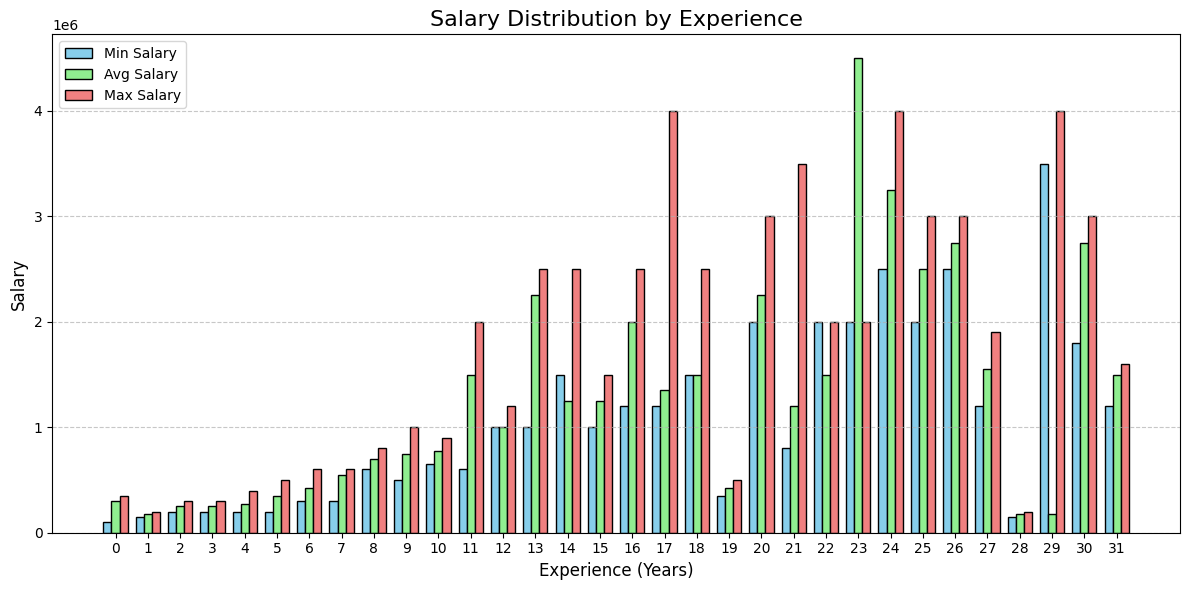

In [28]:
df_pr = df[df['max_salary'] != 'Not disclosed']

df_pr['min_salary'] = df_pr['min_salary'].astype(int)
df_pr['max_salary'] = df_pr['max_salary'].astype(int)

df_pr['avg_salary'] = ((df_pr['min_salary'] + df_pr['max_salary'])/2).astype(int)


lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['end_exp'] == i]['min_salary'].mode()[0],
              df_pr[df_pr['end_exp'] == i]['avg_salary'].mode()[0],
              df_pr[df_pr['end_exp'] == i]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()

### Summary: Salary Distribution by Experience

- **Trend:** Salaries (minimum, average, and maximum) increase with experience, showing a clear positive correlation.

#### Key Insights:
- **Maximum Salary Peaks:** Notable spikes in maximum salaries at 17, 23, and 28 years of experience, with values exceeding 4 million.
- **Salary Gaps:** Significant disparity between minimum and maximum salaries, especially for 10-20 years of experience.
- **Steady Growth:** Minimum salaries show a gradual increase, with fewer fluctuations compared to maximum salaries.
- **Plateau Beyond 25 Years:** Salaries stabilize but maintain significant variations.

This chart highlights salary trends, emphasizing high variance for mid-to-senior levels and specific peaks requiring further investigation.


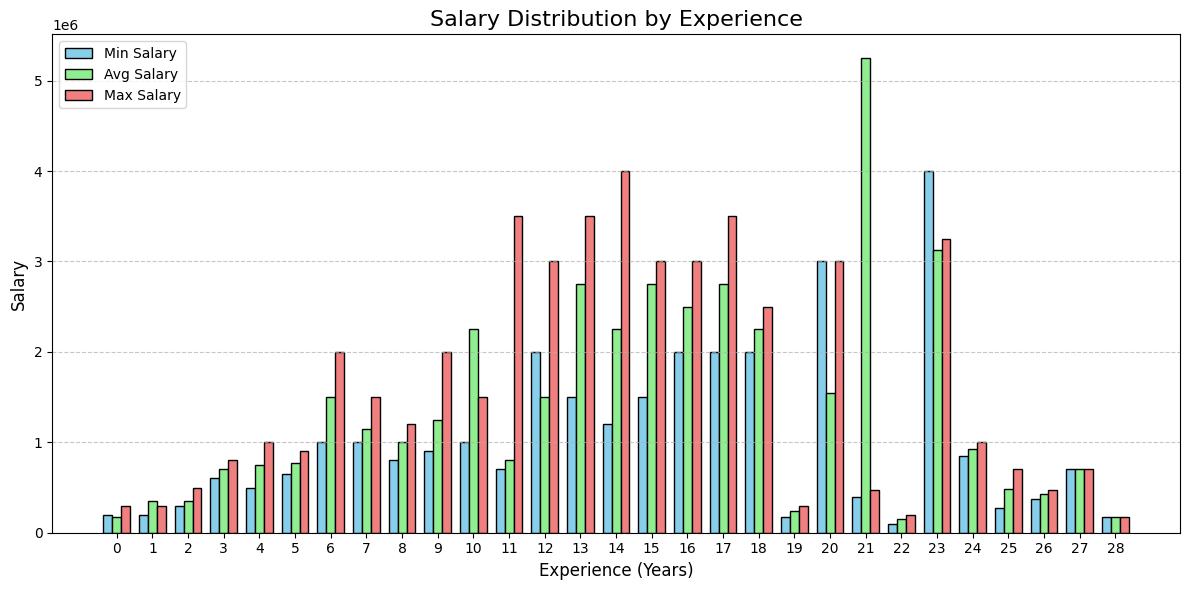

In [29]:
lst = []

for i in np.sort(df_pr['start_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['start_exp'] == i]['min_salary'].mode()[0],
              df_pr[df_pr['start_exp'] == i]['avg_salary'].mode()[0],
              df_pr[df_pr['start_exp'] == i]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()


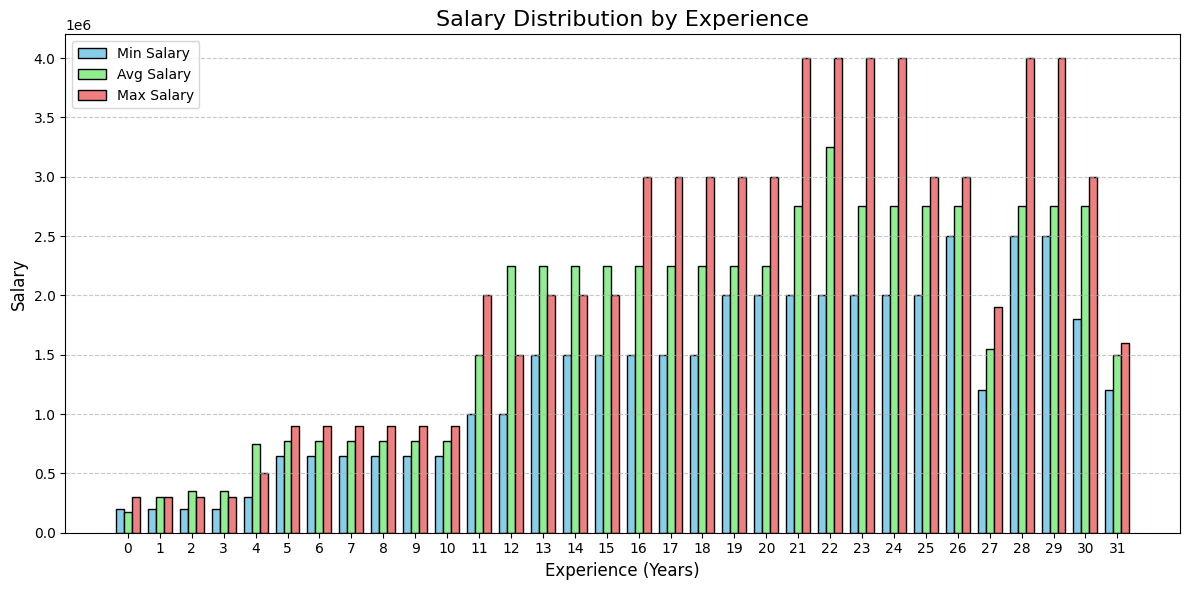

In [30]:
lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['min_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['avg_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()



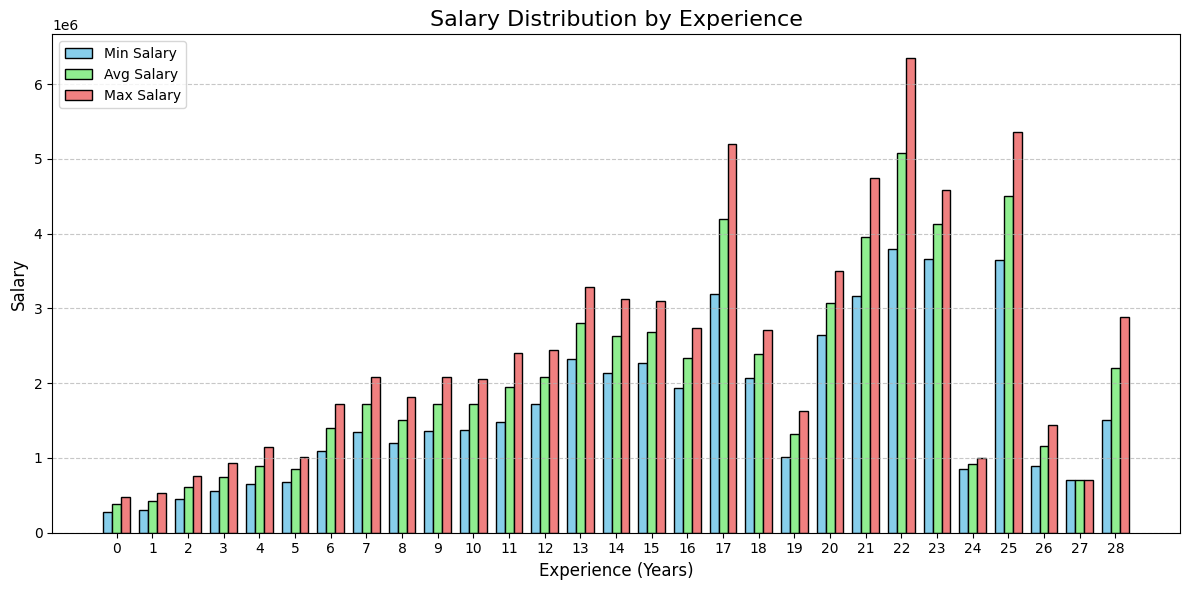

In [31]:
lst = []

for i in np.sort(df_pr['start_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['start_exp'] == i]['min_salary'].mean(),
              df_pr[df_pr['start_exp'] == i]['avg_salary'].mean(),
              df_pr[df_pr['start_exp'] == i]['max_salary'].mean()])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()


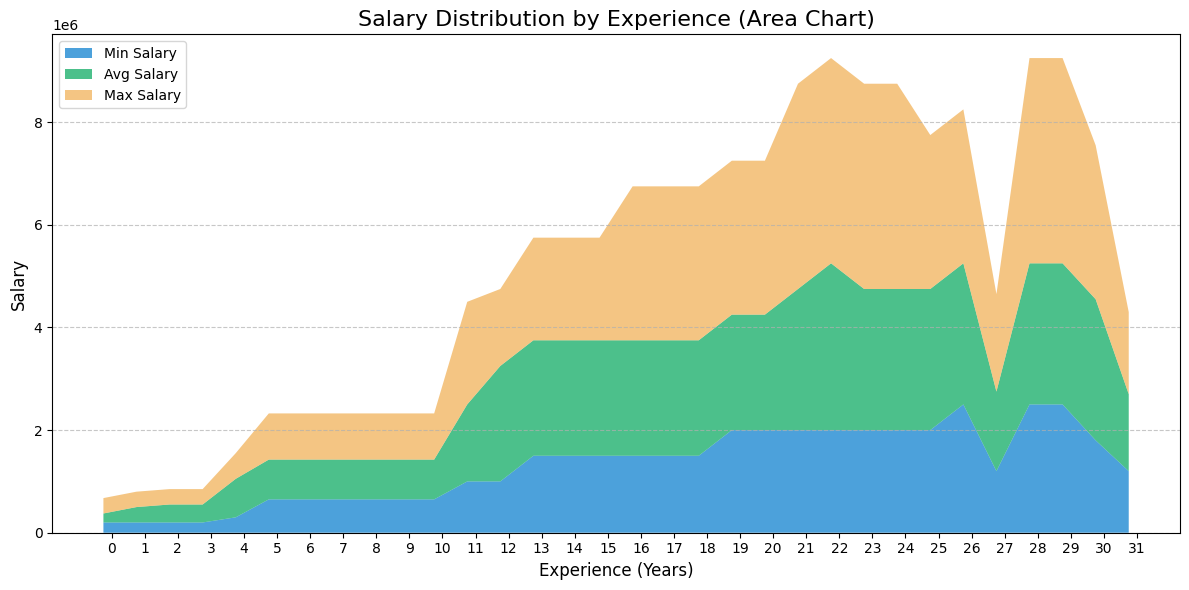

In [32]:
lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['min_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['avg_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the area chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.stackplot(r1, min_salary, avg_salary, max_salary, alpha=0.7,
             colors=['#007acc', '#00a65a', '#f0ad4e'],
             labels=['Min Salary', 'Avg Salary', 'Max Salary'])

# Customize the plot
plt.title('Salary Distribution by Experience (Area Chart)', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()

#### 3.6) Salary Distribution

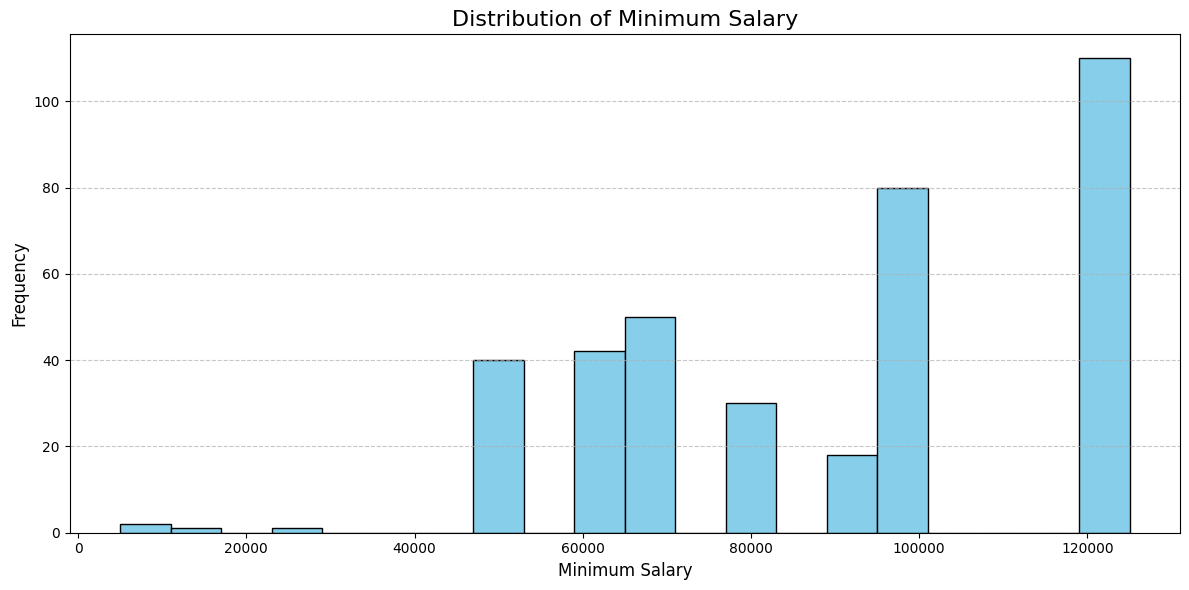

In [33]:
import matplotlib.pyplot as plt

min_salary_numeric = df[df['max_salary'] != 'Not disclosed']['max_salary'].astype(int)

min_salary_numeric = min_salary_numeric[min_salary_numeric < 150000]

# Create a histogram with customizations
plt.figure(figsize=(12, 6))  # Set figure size
plt.hist(min_salary_numeric, bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Minimum Salary', fontsize=16)
plt.xlabel('Minimum Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
- Salary vs Experience of any Company

1. Analyze Company Ratings
  - Calculate the average rating for each company
  - Identify companies with the highest and lowest average ratings.
  - Compare the distribution of ratings across different companies.
  - Calculate the total number of reviews for each company. | Sort to get most and LiteralString

- List the top 10 companies based on average rating and number of reviews.
- Analyze the characteristics and practices of these top-rated companies. | Most Popular Responsibilities of top 100 companies


SyntaxError: invalid syntax (<ipython-input-34-199f543237da>, line 1)

In [40]:
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,job_link,company_link,company_id,start_exp,end_exp,salary_clean,min_salary,max_salary
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110,"Customer Service,Sales,Relationship Management",https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213,213,1,6,Not disclosed,Not disclosed,Not disclosed
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Product management,Market analysis,Change mana...",https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...,7682,11,15,Not disclosed,Not disclosed,Not disclosed
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,7682,3,7,Not disclosed,Not disclosed,Not disclosed
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129,"Business process,Change management,Team manage...",https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,7682,3,7,Not disclosed,Not disclosed,Not disclosed
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...,30528,5,7,Not disclosed,Not disclosed,Not disclosed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73762,20123002989,Partner Success Executive/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Jalandhar, Chandigarh, Amritsar",0.0,0,"CRM,Communication Skills,Presentation Skills,C...",https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,979910,1,5,"7,00,000 - 8,50,000 PA.",700000,850000
73763,20123002957,Partner Success Associate/Edtech/Punjab,Parth Associates,1-5 Yrs,"7,00,000 - 8,50,000 PA.","Ludhiana, Patiala, Moga",0.0,0,"CRM,Communication Skills,Presentation Skills,C...",https://www.naukri.com/job-listings-partner-su...,https://www.naukri.com/parth-associates-jobs-c...,979910,1,5,"7,00,000 - 8,50,000 PA.",700000,850000
73764,231222003986,Hiring For International Voice Process | Gurga...,First Step Solutions,1-4 Yrs,"3,00,000 - 4,50,000 PA.","New Delhi, Gurgaon/Gurugram",0.0,0,"Customer Service,US Process,Hospitality,Custom...",https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/first-step-solutions-jo...,2981606,1,4,"3,00,000 - 4,50,000 PA.",300000,450000
73765,171220001449,Fresher Engineer,Sofcon,0-2 Yrs,Not disclosed,"Kota, Udaipur, Banswara, Bhiwadi, Jaipur, Alwa...",2.8,3,"ENGINEERING,B Tech Fresher,AutoCAD,Degree,PLC,...",https://www.naukri.com/job-listings-fresher-en...,https://www.naukri.com/sofcon-jobs-careers-110403,110403,0,2,Not disclosed,Not disclosed,Not disclosed


In [42]:
df.to_csv('clean_data.csv')

In [49]:
company_names = df.groupby('company_id')['company'].agg(lambda x: x.mode()[0])
company_dict = company_names.to_dict()

company_dict

{'1000188': 'Rockwell Industries', '1000442': 'Varsity Education Management', '100053': 'Venus Associates', '1000784': 'Delgence Technologies', '10009': 'National Dairy Development Board (NDDB)', '1000902': 'Decisivedge', '100107': 'Apex Services', '1001248': 'Eversana', '1001716': 'Hucon', '10020': 'The Right Links Management Consultants', '1002560': 'Vimal Fire Controls', '100258': 'Satin Creditcare Network', '1002842': 'Mendine Pharmaceuticals', '1003180': 'Advids', '1003318': 'Fusion Scientific Laboratories', '1003450': 'Pyrotech Workspace Solutions', '1003552': 'Saxo', '1004094': 'Knoldus Software', '1004458': 'Azilen', '1004626': 'Pack N Go Holidays', '1005580': 'Aditi Tracking Support', '1005744': 'Oxygent International Bpo Technical Bpo Headhunter', '1006388': 'Aptean', '1006558': 'Agiliad Technologies', '100762': 'Deshpande Foundation', '1007628': 'Success Consultancy Services', '1007678': 'Sun Hr Services', '1007906': 'Brain4ce Education Solutions', '100802': 'Darshan Softech

In [48]:
df['company'] = df['company_id'].map(company_dict)

13790

In [52]:
df['company_id'].map(company_dict).nunique()

13735

In [ ]:
df['company_id'].map(company_dict).